# <center>Diabetes Data analysis using Machine Learning

<img src="diabetess.jpg" width="1000" height="800">

#### Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

#### Loading the dataset

In [2]:
df = pd.read_csv('./diabetes.csv')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
695,7,142,90,24,480,30.4,0.128,43,1
66,0,109,88,30,0,32.5,0.855,38,1
189,5,139,80,35,160,31.6,0.361,25,1
266,0,138,0,0,0,36.3,0.933,25,1
104,2,85,65,0,0,39.6,0.930,27,0
614,11,138,74,26,144,36.1,0.557,50,1
669,9,154,78,30,100,30.9,0.164,45,0
498,7,195,70,33,145,25.1,0.163,55,1
81,2,74,0,0,0,0.0,0.102,22,0
350,4,92,80,0,0,42.2,0.237,29,0


#### Exploring the data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.rename(columns={"Outcome":"Diabetes"},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### checking the null percentage

In [10]:
df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Diabetes                    0.0
dtype: float64

#### Chceking duplicate values

In [11]:
df.duplicated().mean()*100

0.0

## Explorartory Data Analysis

### Univariate Analysis

#### Histogram 

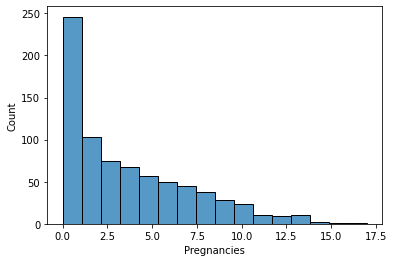

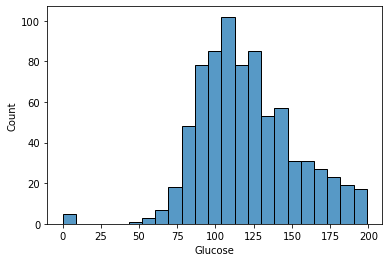

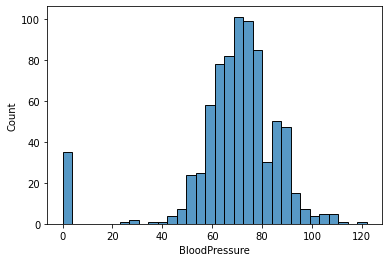

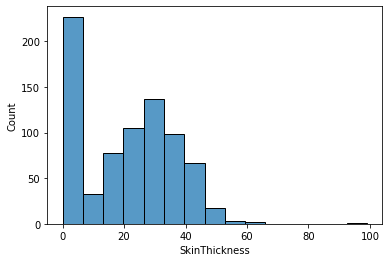

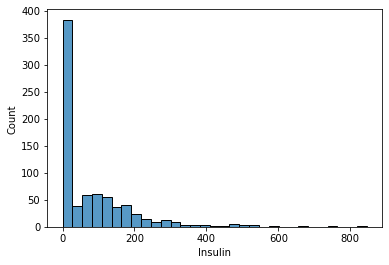

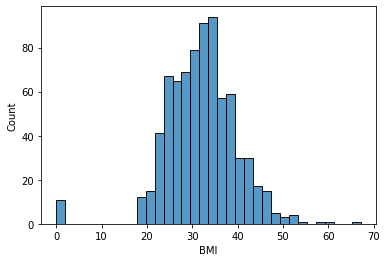

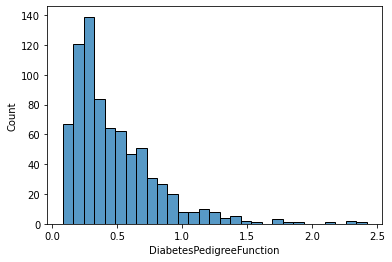

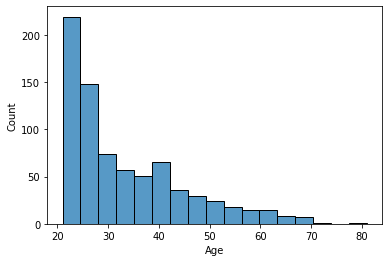

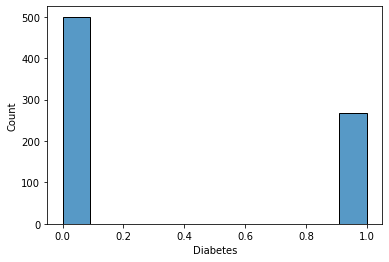

In [12]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

#### Kde Plot

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

#### Box Plot

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i])
        plt.show();

### Multivariate Analysis

#### Bar Chart

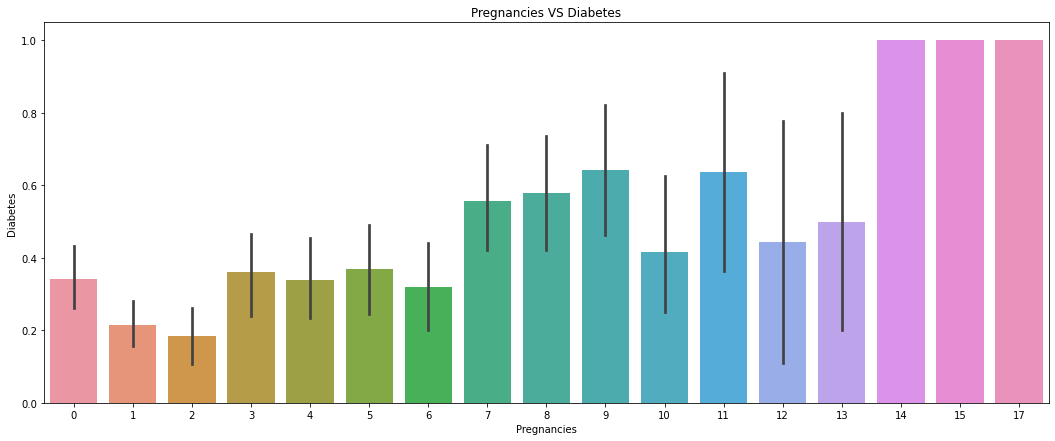

In [13]:
plt.figure(figsize=(18,7))
plt.title("Pregnancies VS Diabetes")
sns.barplot(x='Pregnancies', y='Diabetes', data=df);

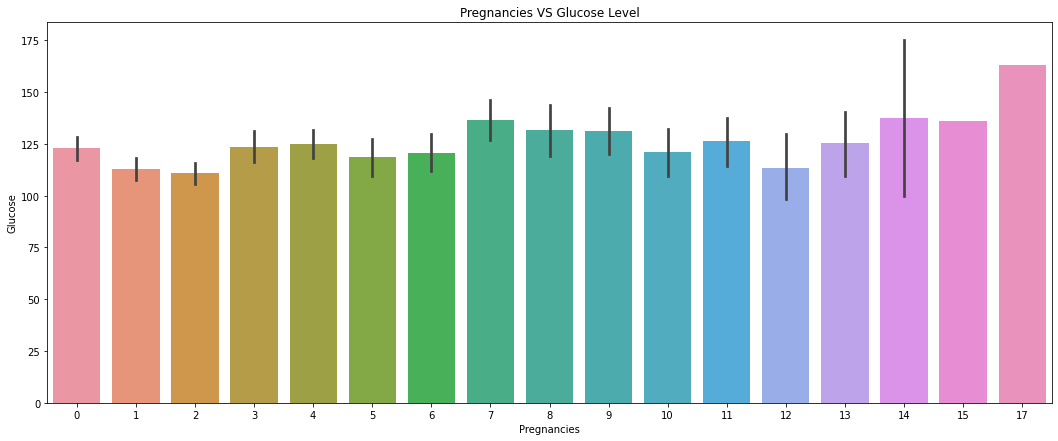

In [14]:
plt.figure(figsize=(18,7))
plt.title("Pregnancies VS Glucose Level")
sns.barplot(x='Pregnancies', y='Glucose', data=df);

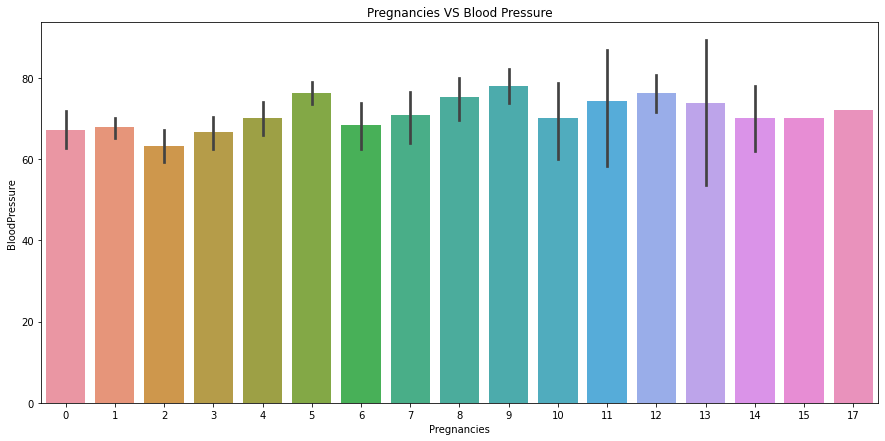

In [17]:
plt.figure(figsize=(15,7))
plt.title("Pregnancies VS Blood Pressure")
sns.barplot(x='Pregnancies', y='BloodPressure', data=df);

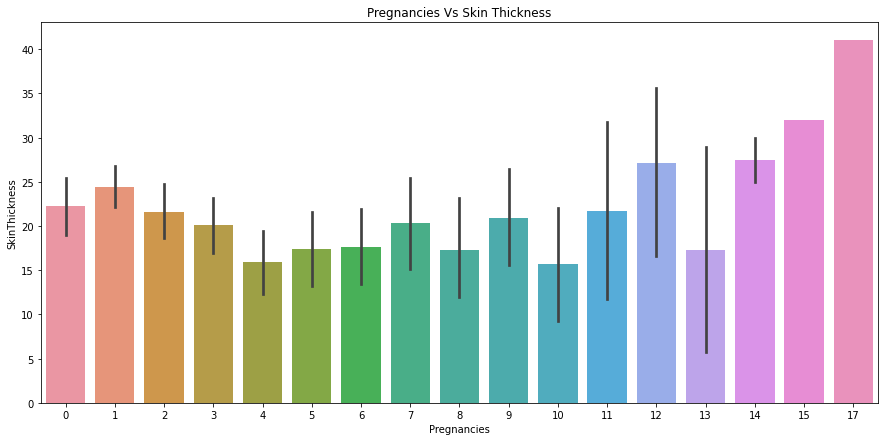

In [18]:
plt.figure(figsize=(15,7))
plt.title("Pregnancies Vs Skin Thickness")
sns.barplot(x='Pregnancies', y='SkinThickness', data=df);

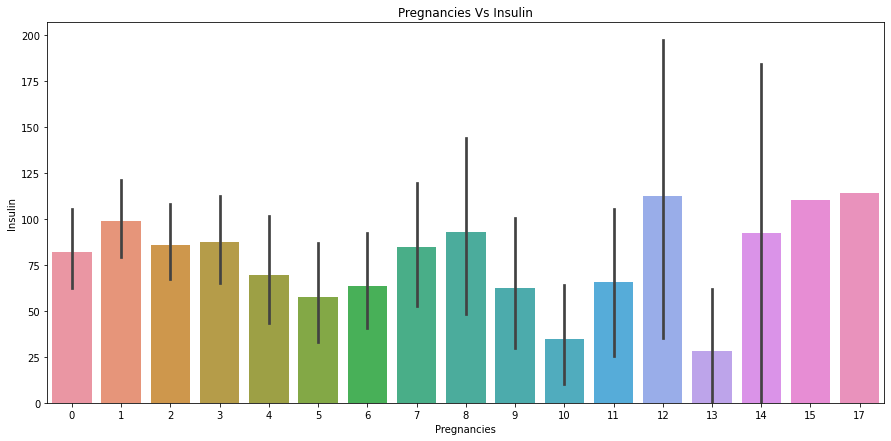

In [20]:
plt.figure(figsize=(15,7))
plt.title("Pregnancies Vs Insulin")
sns.barplot(x='Pregnancies', y='Insulin', data=df);

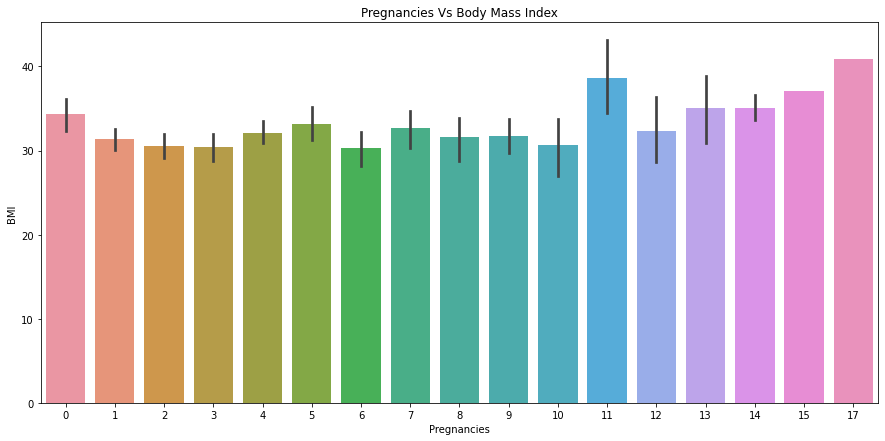

In [21]:
plt.figure(figsize=(15,7))
plt.title("Pregnancies Vs Body Mass Index")
sns.barplot(x='Pregnancies', y='BMI', data=df);

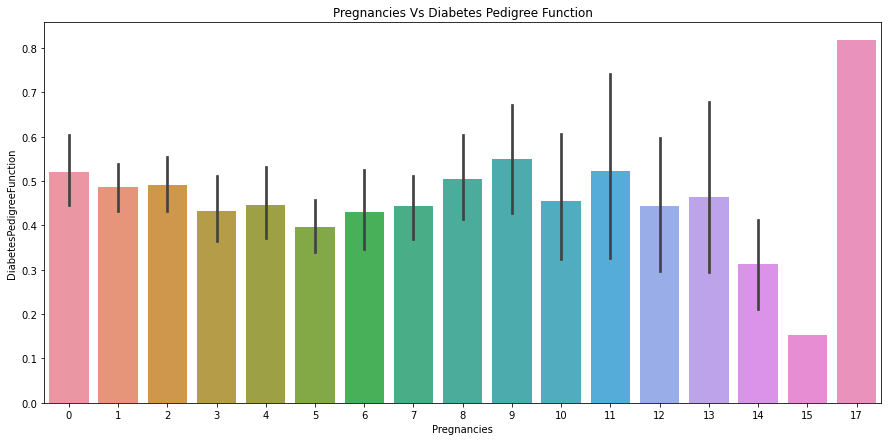

In [22]:
plt.figure(figsize=(15,7))
plt.title("Pregnancies Vs Diabetes Pedigree Function")
sns.barplot(x='Pregnancies', y='DiabetesPedigreeFunction', data=df);

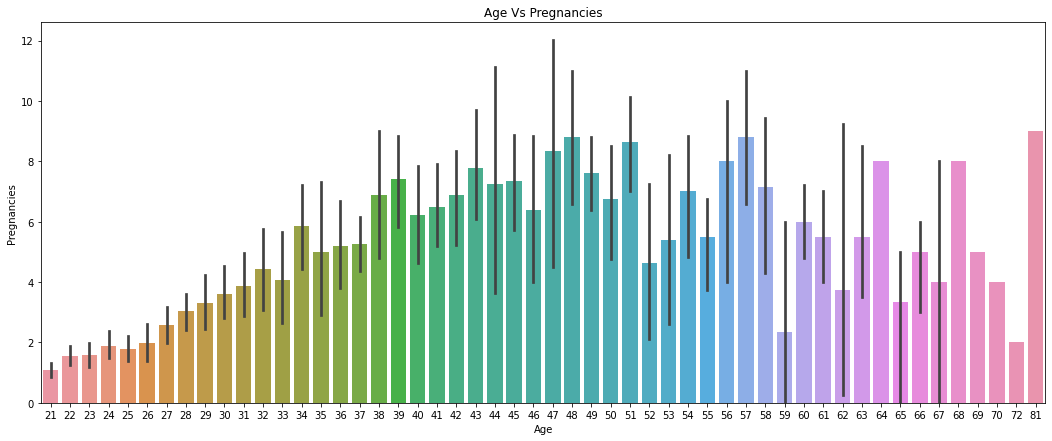

In [27]:
plt.figure(figsize=(18,7))
plt.title("Age Vs Pregnancies")
sns.barplot(x='Age', y='Pregnancies', data=df);

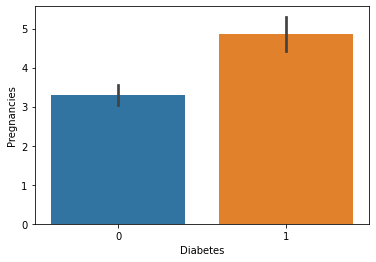

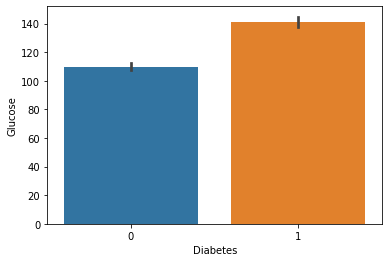

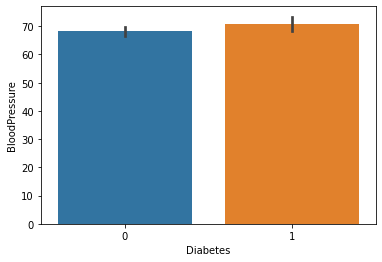

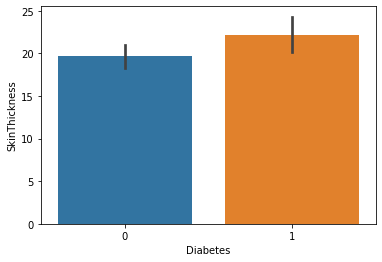

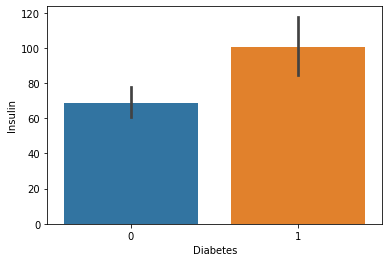

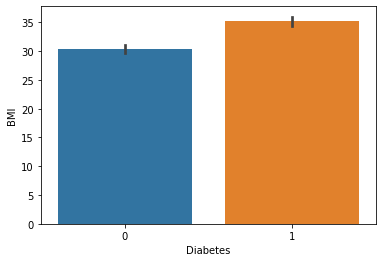

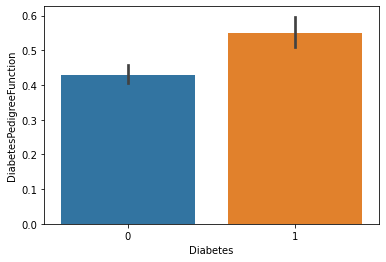

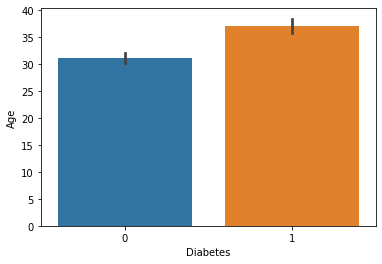

In [19]:
a = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in a:
    sns.barplot(x="Diabetes",y=df[i],data=df);
    plt.show();

#### Pie Chart

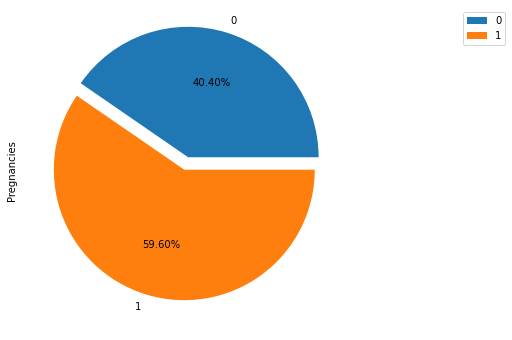

In [32]:
plt.figure(figsize=(14,6))
diabetes_pregnancies=df.groupby(['Diabetes'])['Pregnancies'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

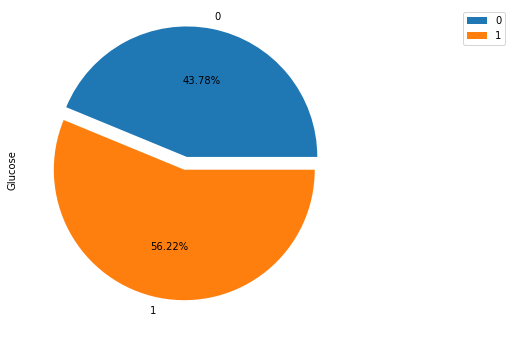

In [31]:
plt.figure(figsize=(14,6))
diabetes_glucose=df.groupby(['Diabetes'])['Glucose'].mean()
explode=0.1,0
diabetes_glucose.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

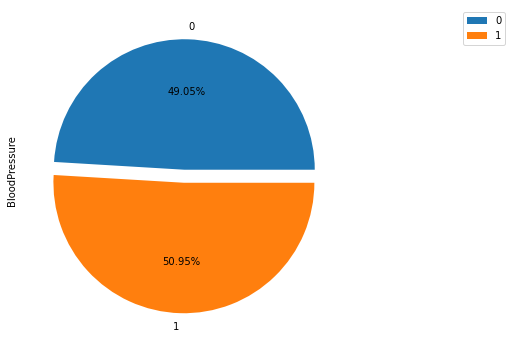

In [37]:
plt.figure(figsize=(14,6))
diabetes_BloodPressure=df.groupby(['Diabetes'])['BloodPressure'].mean()
explode=0,0.1
diabetes_BloodPressure.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

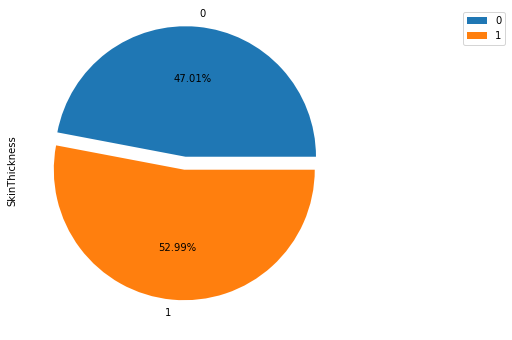

In [38]:
plt.figure(figsize=(14,6))
diabetes_SkinThickness=df.groupby(['Diabetes'])['SkinThickness'].mean()
explode=0.1,0
diabetes_SkinThickness.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

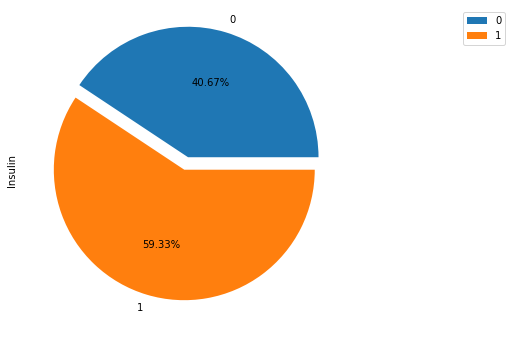

In [39]:
plt.figure(figsize=(14,6))
diabetes_Insulin=df.groupby(['Diabetes'])['Insulin'].mean()
explode=0.1,0
diabetes_Insulin.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

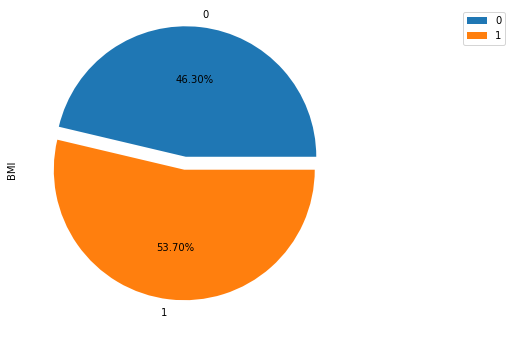

In [41]:
plt.figure(figsize=(14,6))
diabetes_BMI=df.groupby(['Diabetes'])['BMI'].mean()
explode=0.1,0
diabetes_BMI.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

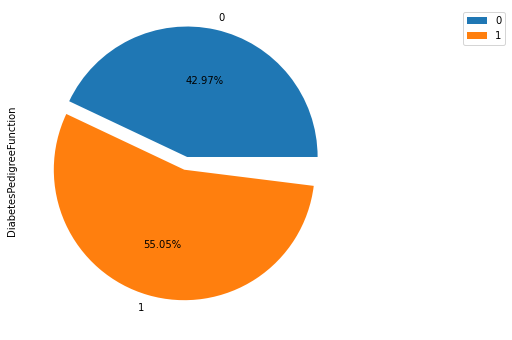

In [42]:
plt.figure(figsize=(14,6))
diabetes_DiabetesPedigreeFunction=df.groupby(['Diabetes'])['DiabetesPedigreeFunction'].mean()
explode=0.1,0
diabetes_DiabetesPedigreeFunction.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

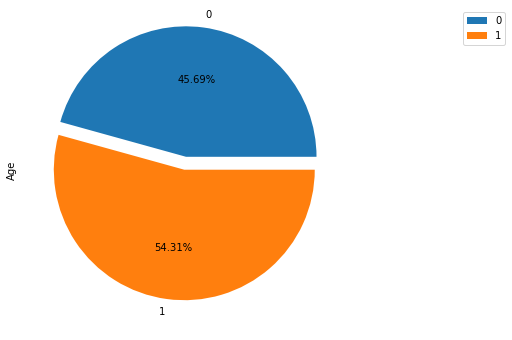

In [43]:
plt.figure(figsize=(14,6))
diabetes_Age=df.groupby(['Diabetes'])['Age'].mean()
explode=0.1,0
diabetes_Age.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

#### Pair Plot

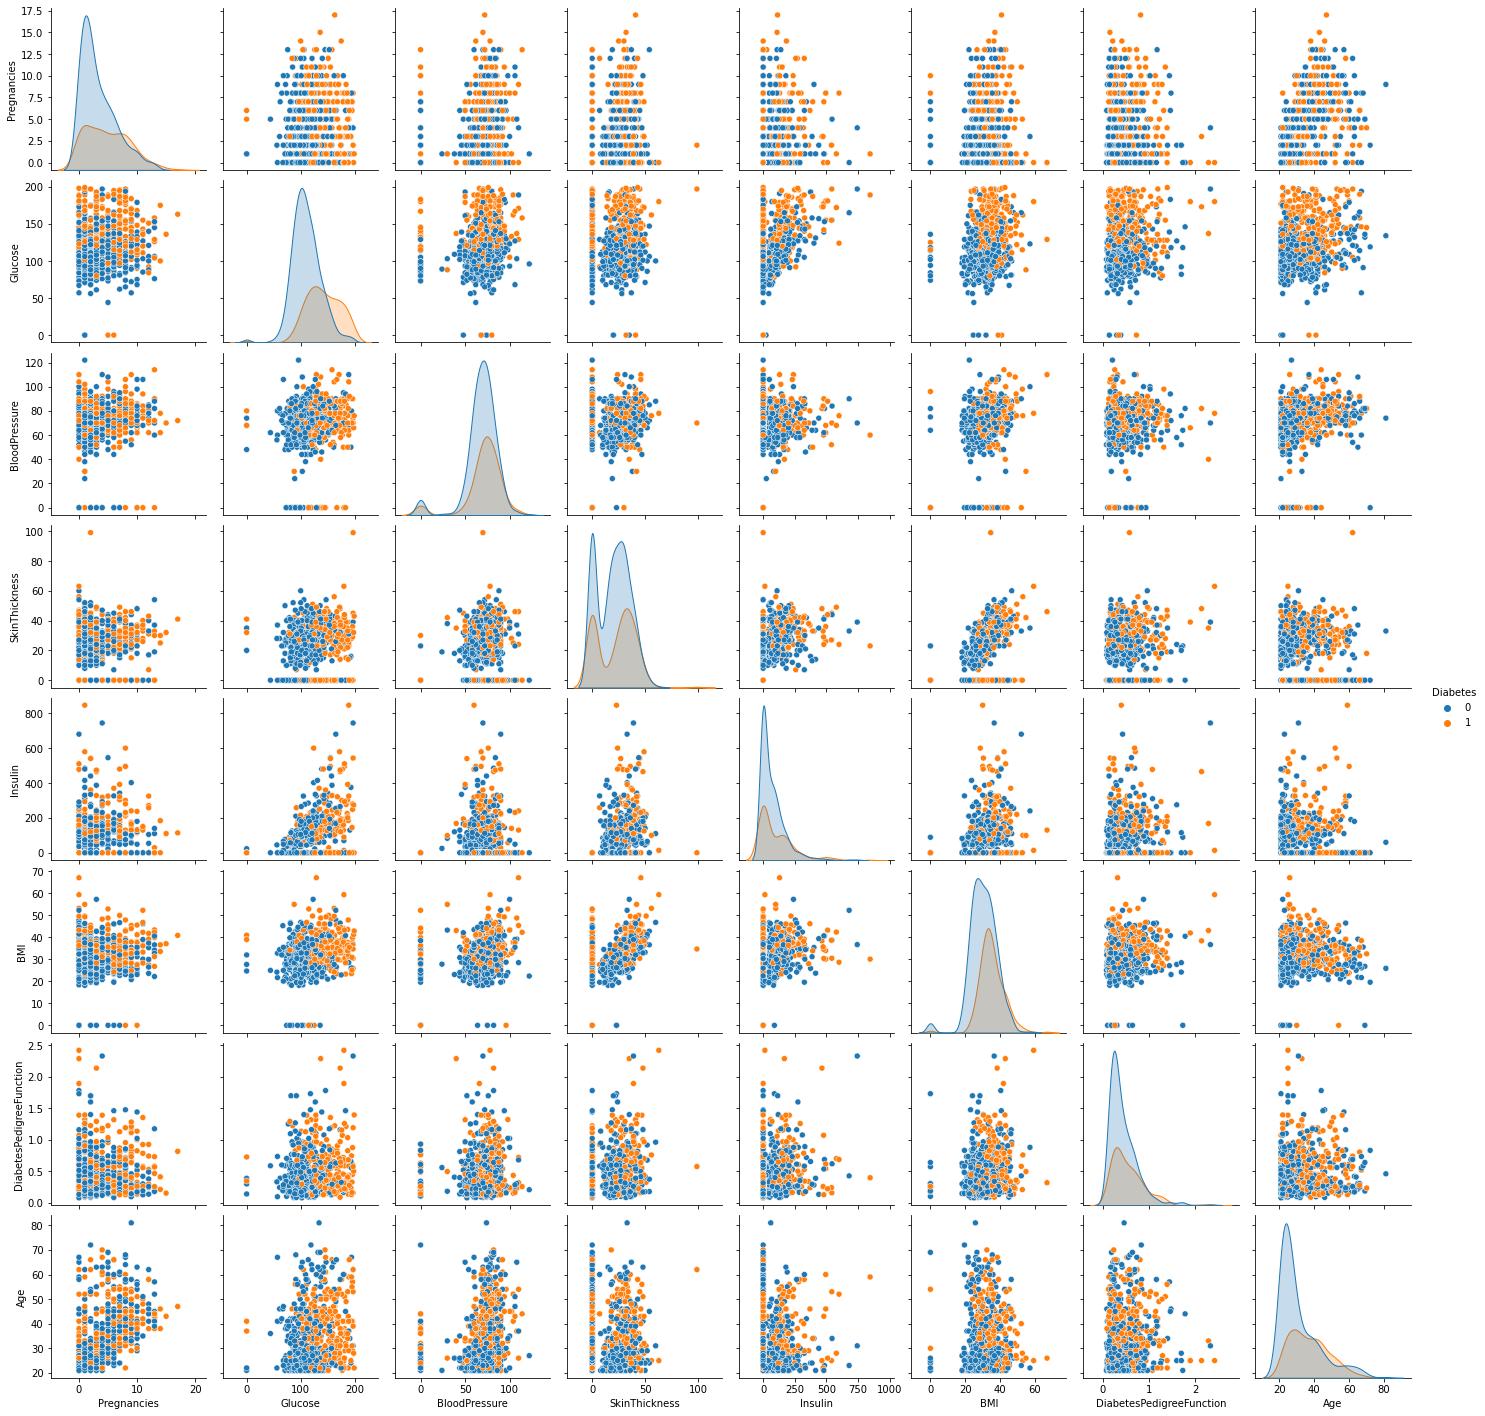

In [44]:
sns.pairplot(data=df,kind="scatter", hue="Diabetes");
plt.show();

#### Line Chart

In [45]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

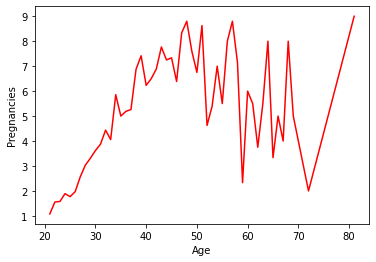

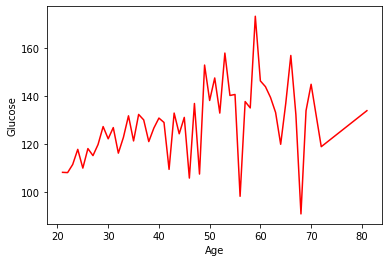

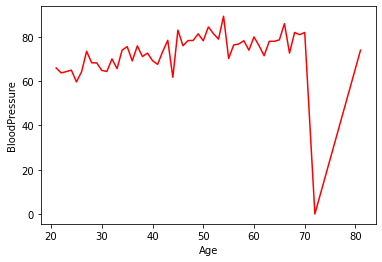

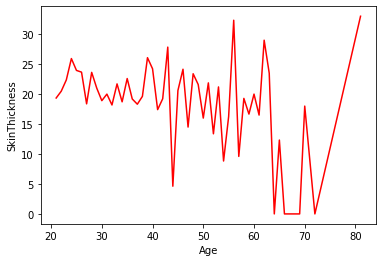

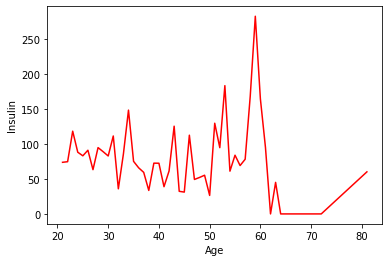

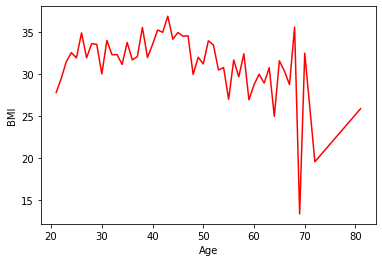

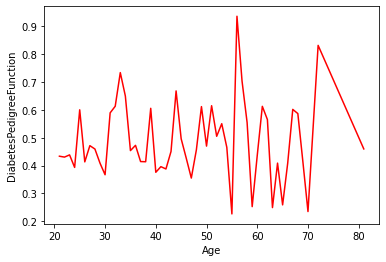

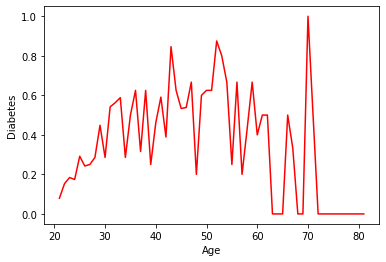

In [48]:
a = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Diabetes']
for i in a:
    sns.lineplot(x="Age",y=df[i],data=df,ci=None,color="Red")
    plt.show();

#### Scaling

In [49]:
x=df.iloc[:,:-1].values

In [50]:
y=df.iloc[:,-1].values

#### Check whether the data is imbalanced

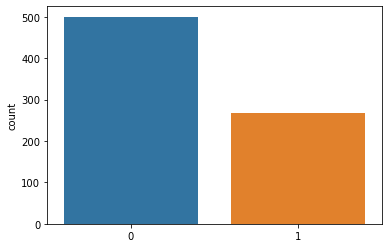

In [51]:
sns.countplot(x=y);

#### We can see that the data is balanced, so we use oversampling

###### Initialize the sampler

In [52]:
over_sampler = RandomOverSampler()

In [53]:
x,y = over_sampler.fit_resample(x,y)

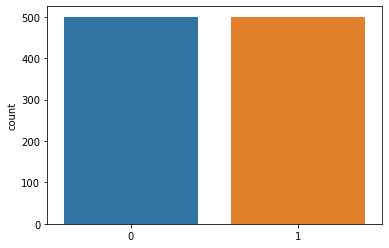

In [54]:
sns.countplot(x=y);

#### we can see now the data is balanced

##### Standarize

In [55]:
df.Diabetes.unique()

array([1, 0], dtype=int64)

In [56]:
sc=StandardScaler()

In [57]:
x=sc.fit_transform(x)

#### Selecting Random Forest classifier

In [58]:
model = RandomForestClassifier()

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.89
confusion_matrix train is::  [[395   0]
 [  0 405]]
confusion_matrix test is::  [[86 19]
 [ 3 92]]
Wrong Predictions made: 22 / 200
************************************************************


##### Now we can Compare the actual and predicted value

In [61]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.sample(10)

,ACTUAL,PREDICTION
245,1,1
771,1,1
229,0,0
65,0,0
505,0,0
46,0,0
843,1,1
855,1,1
740,1,1
255,1,1


#### Plotting Confusion Matrix for training and testing

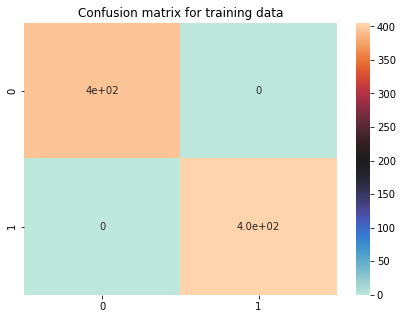

In [64]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='icefire');

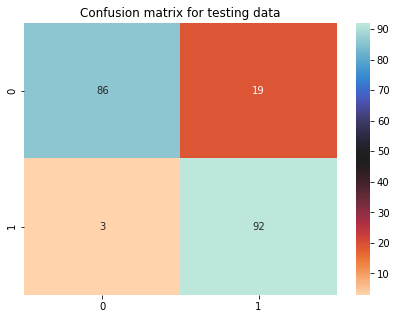

In [65]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='icefire_r');

### Computing ROC and AUC

Model used is :: RandomForestClassifier()


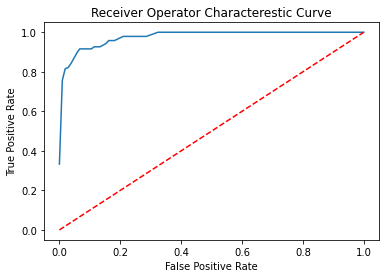

In [73]:
model.fit(x_train,y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
print("Model used is ::",model)
sns.lineplot(x=fpr,y=tpr,ci=None)
plt.plot([0,1],[0,1],color="Red",linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characterestic Curve')
plt.show();